In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../data/rawdata/Property_data.csv')
restaraunt_df = pd.read_csv('../data/rawdata/restaurant_count_2.csv')
crime_df = pd.read_csv('../data/cleandata/Harris_County_Crime_Ct_by_zipcode.csv')
flood_df = pd.read_csv('../data/rawdata/flooding_insurance_by_zip.csv')

In [3]:
df = df.groupby('zip').mean().sort_values(by='property tax', ascending=False).reset_index()
df.head()

,zip,lat,lng,house area,lot area,high,low,estimate,month value change,property tax
0,77024,29.765914,-95.527347,4146.409639,27985.343816,1421993.648,1210999.696,1311313.400,-688.116000,1.385594e+06
1,77019,29.751454,-95.405515,3447.739479,9127.534274,1516825.420,1234718.354,1337546.668,-558.725451,1.368548e+06
2,77005,29.717924,-95.428469,3363.540000,7277.734406,1282708.420,1099375.018,1185270.596,10074.394790,1.194511e+06
3,77056,29.748206,-95.470357,3952.074148,10797.330526,1251102.552,1054554.496,1144477.220,2122.122000,1.158416e+06
4,77027,29.739627,-95.446080,3279.528112,8373.418410,1174902.294,991698.634,1077188.354,1735.967936,1.078855e+06


In [4]:
restaraunt_df.loc[restaraunt_df['zipcode'] == df.iloc[66, 0]]#.iloc[0, 2]
# len(restaraunt_df)

,lat,lng,# Restaurants,zipcode
134,29.539422,-95.134995,53,77598


In [4]:
restaurant_v_estimate = pd.DataFrame(data= {'zip':'', 'num_rest':'', 'estimate':''}, index = [i for i in range(len(df))])

for i in range(len(restaurant_v_estimate)):
    restaurant_v_estimate.iat[i, 0] = df.iloc[i, 0]
    try:
#         print(i)
        restaurant_v_estimate.iat[i, 1] = restaraunt_df.loc[restaraunt_df['zipcode'] == df.iloc[i, 0]].iloc[0, 2]
    except IndexError:
        print(i)
    restaurant_v_estimate.iat[i, 2] = df.iloc[i, 7]
restaurant_v_estimate.head()
# restaurant_v_estimate.drop(66)


,zip,num_rest,estimate
0,77024,0,1.31131e+06
1,77019,25,1.33755e+06
2,77005,60,1.18527e+06
3,77056,58,1.14448e+06
4,77027,45,1.07719e+06


In [10]:
crime_df.head()

,ZIP,LAT,LNG,Violet Crime Ct,Non-Violet Crime Ct
0,77002,29.756845,-95.365652,45,210
1,77004,29.724893,-95.363752,32,65
2,77003,29.749778,-95.345885,12,75
3,77006,29.740970,-95.391301,19,183
4,77005,29.718435,-95.423555,3,58


In [15]:
restaurant_v_estimate['violent crime'] = 0
restaurant_v_estimate['non-violent crime'] = 0
restaurant_v_estimate = restaurant_v_estimate.sort_values(by = 'zip')
crime_df = crime_df.sort_values(by = 'ZIP')
restaurant_v_estimate['violent crime'] = crime_df['Violet Crime Ct']
restaurant_v_estimate['non-violent crime'] = crime_df['Non-Violet Crime Ct']
restaurant_v_estimate.head()

,zip,num_rest,estimate,violent crime,non-violent crime
33,77003,41,304619,12,42
31,77004,10,332700,0,1
2,77005,60,1.18527e+06,12,75
9,77006,60,642617,3,14
12,77007,60,528380,0,5


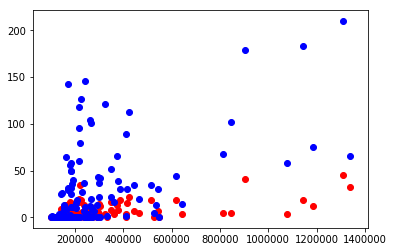

In [25]:
# df.index.tolist()
plt.scatter(restaurant_v_estimate['estimate'], restaurant_v_estimate['violent crime'], color = 'red')
plt.scatter(restaurant_v_estimate['estimate'], restaurant_v_estimate['non-violent crime'], color = 'blue')


In [29]:
flood_df = flood_df.sort_values(by = 'PostalCode')
flood_df.head()

,StateCode,CountyName,PostalCode,Locations,Building_TIV,Contents_TIV,Building_Limit,Contents_Limit
0,TX,Harris,77002,157,1.146599e+09,1.390003e+08,122273700,29113200
1,TX,Harris,77003,287,2.175743e+08,2.843671e+07,63492400,30093900
2,TX,Harris,77004,1052,8.208479e+08,7.126165e+07,335596500,92368400
3,TX,Harris,77005,4043,4.296319e+09,4.542693e+08,988278400,380594300
4,TX,Harris,77006,1318,7.685005e+08,8.814417e+07,314864400,127083900


In [47]:
restaurant_v_estimate['num_insured'] = flood_df['Locations']
restaurant_v_estimate['building_tiv'] = flood_df['Building_TIV']
restaurant_v_estimate['contents_tiv'] = flood_df['Contents_TIV']
x_axis = [i for i in range(len(restaurant_v_estimate['zip']))]

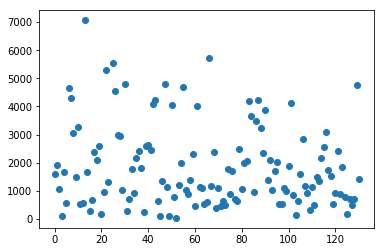

In [48]:
plt.scatter(x_axis, restaurant_v_estimate['num_insured'])

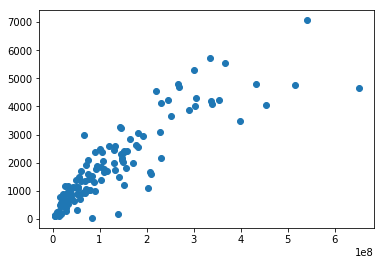

In [50]:
plt.scatter(restaurant_v_estimate['contents_tiv'], restaurant_v_estimate['num_insured'])

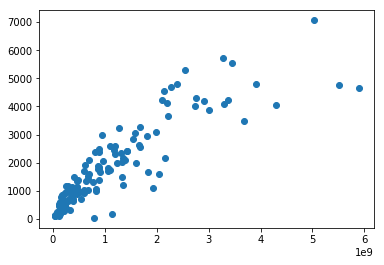

In [53]:
plt.scatter(restaurant_v_estimate['building_tiv'], restaurant_v_estimate['num_insured'])